# Multi-Class Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Loading Iris Dataset

In [2]:
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Task 1: Create predictors and label**

In [6]:
# Write Code Here
X = iris.drop(['Id', 'Species'], axis=1)
Y = iris[['Species']]

**Task 2: Split the data with test size 30 and random state 25**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Write Code Here
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=25)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105, 1)
(45, 4) (45, 1)


**Task 3: Define the model for Random Forest classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Write the code here
model = RandomForestClassifier(max_depth=3, random_state=25)

**Task 4: Train the model**

In [17]:
# Write the code here
model.fit(xtrain, ytrain)

<ipython-input-17-05d603e66e74>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=3, random_state=25)

**Task 5: Get the predictions**

In [19]:
# Write the code here
pred = model.predict(xtest)
pred_prb= model.predict_proba(xtest)

**Task 6: Find the accuracy**

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
#Write the code here
accuracy = accuracy_score(ytest, pred)
print("Accuracy of Multi-Class: {}".format(accuracy))

Accuracy of Multi-Class: 0.9555555555555556


**Task 7: Print Classification Report**

In [22]:
from sklearn.metrics import classification_report

In [23]:
#Write Code here
print(classification_report(ytest, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



### Creating confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(ytest, pred) 

In [26]:
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

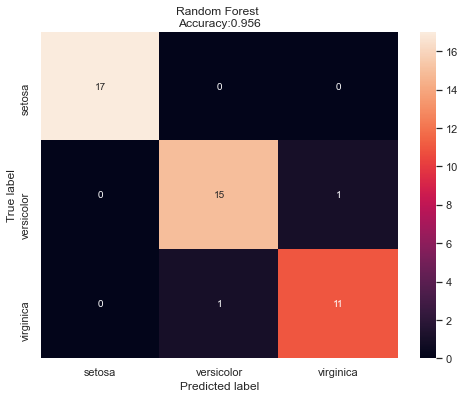

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()